# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜: 2022.04.21
* 이름: 윤태우


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

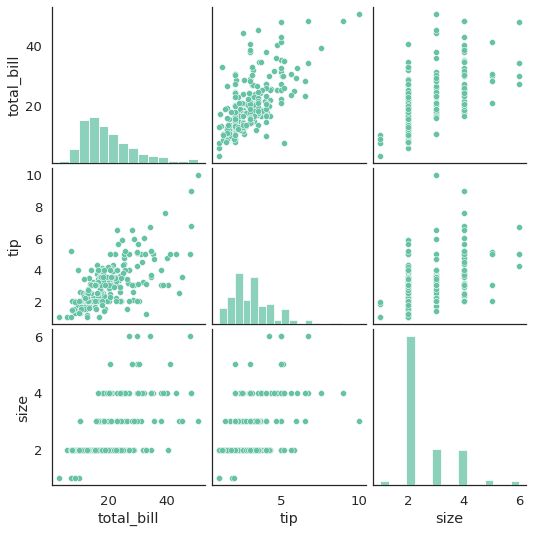

In [5]:
sns.pairplot(tips)

### (2) Categorical plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

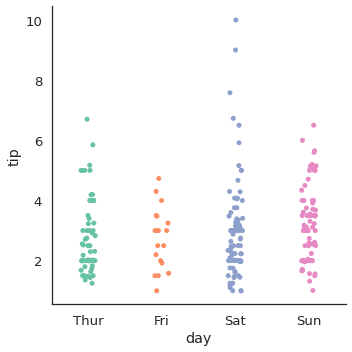

In [7]:
sns.catplot(data = tips, x='day', y='tip')  # 날짜별 팁의 분포
 # kind의 기본 값은 strip

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


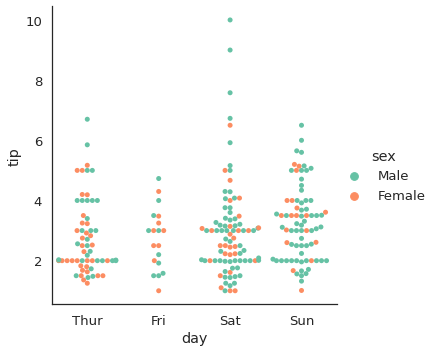

In [11]:
sns.catplot(data = tips, x= 'day', y = 'tip',
            kind = 'swarm',
            hue = 'sex')  # 성별별로 데이터 구분
plt.show()

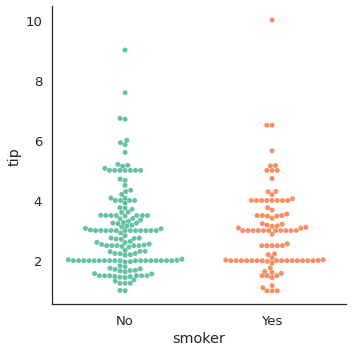

In [17]:
# 흡연 여부에 따라 팁의 분포

sns.catplot(data = tips, x = 'smoker', y = 'tip', 
            kind = 'swarm', 
            order = ['No', 'Yes'])     # 카테고리 순서

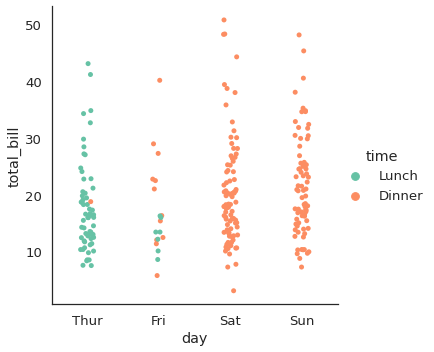

In [19]:
# 요일 별 total_bill 그리기 (시간 구분해서)

sns.catplot(data = tips, x= 'day', y = 'total_bill',
            kind = 'strip',
            hue = 'time')      # 성별별로 데이터 구분
plt.show()

#### | 플롯 분할



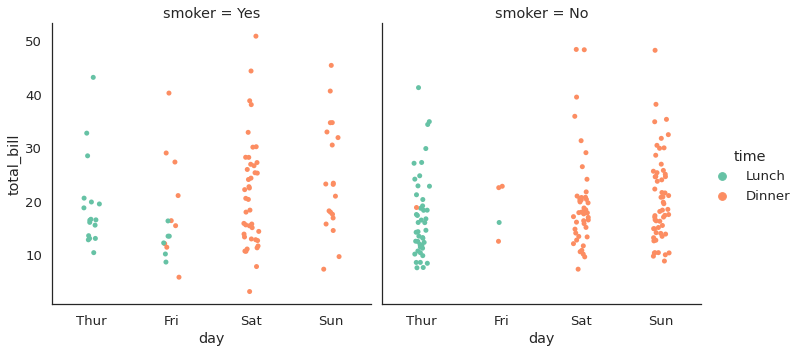

In [20]:
sns.catplot(data = tips, x= 'day', y = 'total_bill',
            hue = 'time', col = 'smoker') # 흡연 여부로 열 분할     
plt.show()

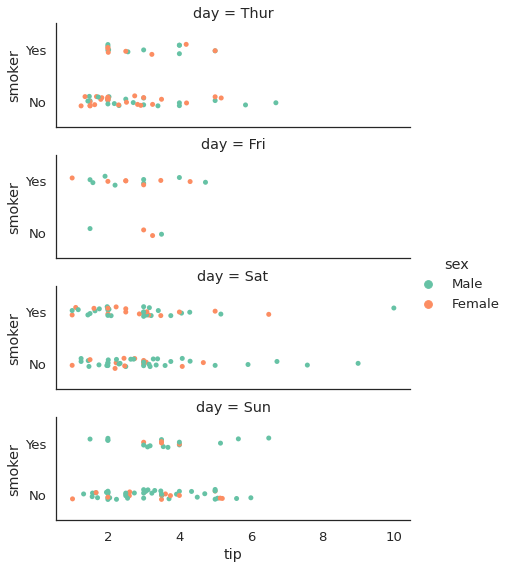

In [24]:
# 수평 플롯(y= 흡연여부, x=tip)
sns.catplot(data = tips, y= 'smoker', x = 'tip',
            row = 'day', # 행으로 분할  
            height = 2, aspect = 3, # 세로 높이, 가로 길이 조절
            hue = 'sex',       # 성별 별로 다르게
            )   
plt.show()

### (3) 범주별 통계 시각화



#### | Bar plots


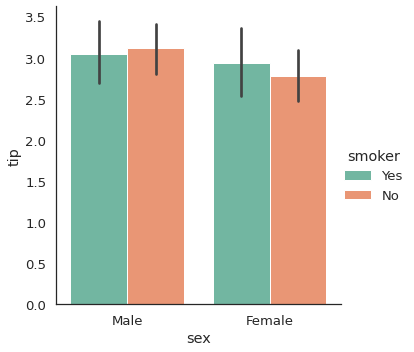

In [30]:
sns.catplot(data=tips, x= 'sex', y='tip',
            kind = 'bar',   # 막대그래프
            hue = 'smoker', # 흡연구분
            )
plt.show()

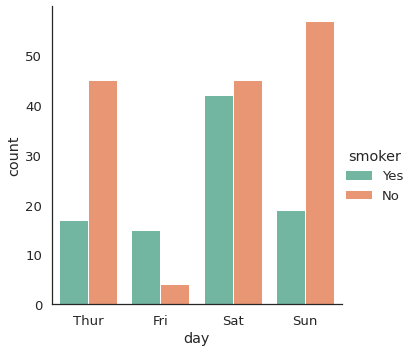

In [32]:
sns.catplot(data=tips, x= 'day',
            kind = 'count',   # 흡연자 수
            hue = 'smoker', # 흡연구분
            )
plt.show()

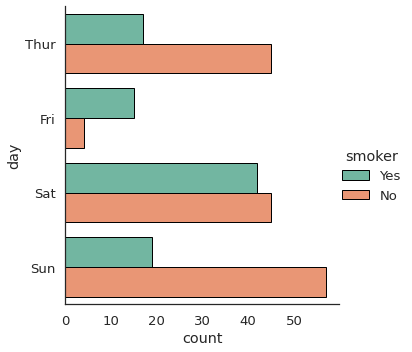

In [35]:
sns.catplot(data=tips, y= 'day',  # 날짜별 카운트
            kind = 'count',  
            hue = 'smoker', edgecolor = 'k' # 흡연구분
            )
plt.show()

#### | Point plots



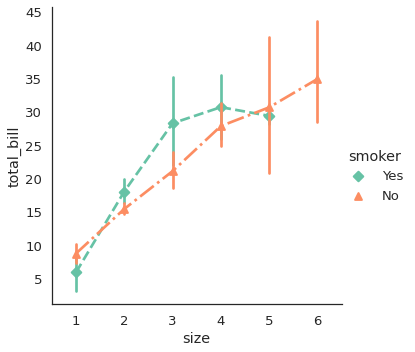

In [41]:
sns.catplot(data=tips, x = 'size', y= 'total_bill',  # 날짜별 카운트
            kind = 'point',  
            hue = 'smoker', 
            linestyles = ['--','-.'], markers = ['D', '^'])
plt.show()

### (4) 범주별 분포 시각화


#### | Box plots


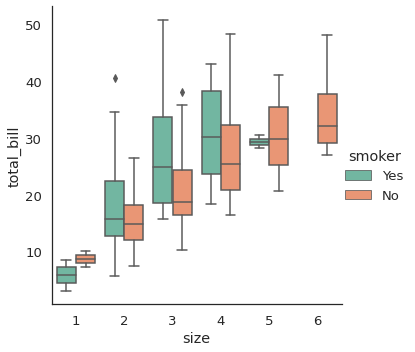

In [43]:
sns.catplot(data=tips, x = 'size', y= 'total_bill',
            kind = 'box',  
            hue = 'smoker', 
            )
plt.show()

#### | Violin plots

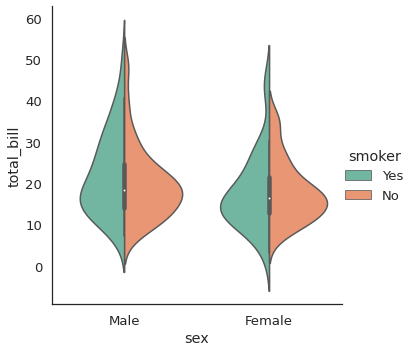

In [50]:
sns.catplot(data=tips, x = 'sex', y= 'total_bill',
            kind = 'violin',  
            hue = 'smoker', 
            split=True, 
            #inner = 'stick'
            )
plt.show()

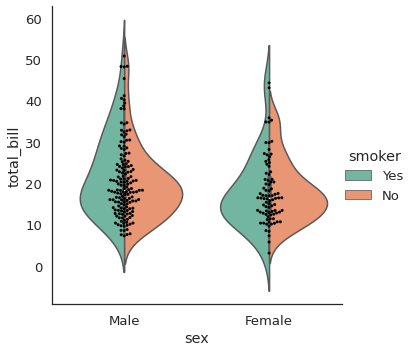

In [55]:
g = sns.catplot(data=tips, x = 'sex', y= 'total_bill',
            kind = 'violin',  
            hue = 'smoker', 
            split=True, 
            #inner = 'stick'
            )

sns.swarmplot(data = tips, x = 'sex', y = 'total_bill', ax = g.ax,
              color = 'k', size = 3)



plt.show()


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [115]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### | 데이터 기본 탐색


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [117]:
df = df.drop(['sibsp', 'parch','deck', 'survived'], axis = 1)
df.isnull().sum()

pclass           0
sex              0
age            177
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [118]:
df[df['embarked'].isnull()]

,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,female,38.0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,female,62.0,80.0,NaN,First,woman,False,NaN,yes,True


In [119]:
df = df.drop([61,829], axis = 0)
df.isnull().sum()

pclass           0
sex              0
age            177
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [120]:
print(f"class = {df['class'].unique()}, \n\npclass = {df['pclass'].unique()}, \n\nembark_town = {df['embark_town'].unique()} \n\nadult_male = {df['adult_male'].unique()}")

class = ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third'], 

pclass = [3 1 2], 

embark_town = ['Southampton' 'Cherbourg' 'Queenstown'] 

adult_male = [ True False]


In [122]:
df.head()

,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True


### (2) Categorical plot


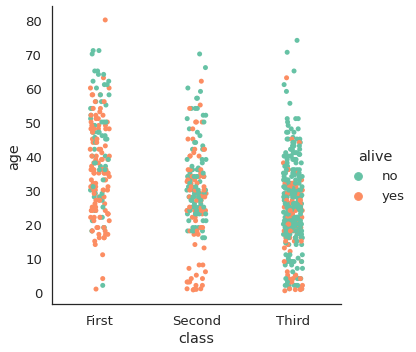

In [124]:
sns.catplot(data=df, x = 'class', y = 'age', 
            hue = 'alive')

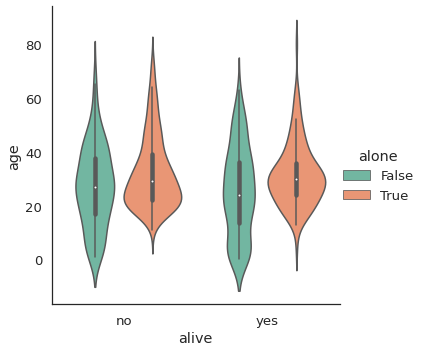

In [128]:
sns.catplot(data=df, x = 'alive', y = 'age', 
            hue = 'alone', kind = 'violin')

#### | 플롯 분할


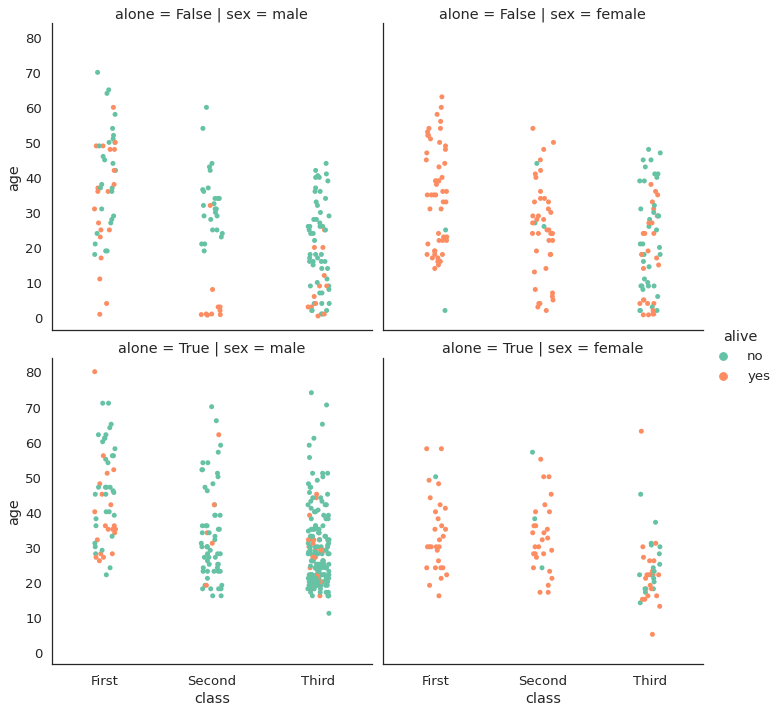

In [130]:
sns.catplot(data=df, x = 'class', y = 'age', 
            hue = 'alive', col = 'sex', row = 'alone')

### (3) 범주별 통계 시각화


#### | Bar plots

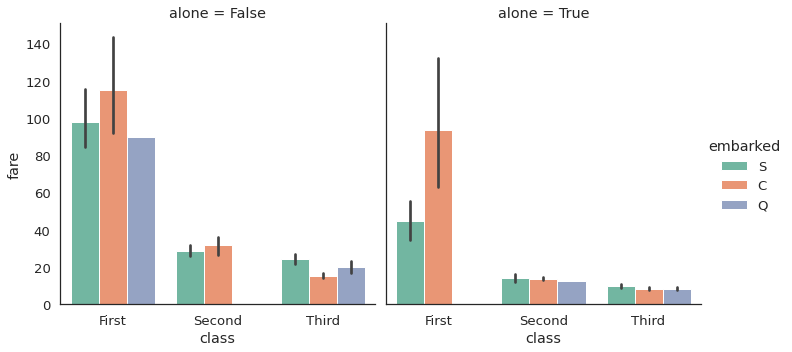

In [144]:
sns.catplot(data=df, x= 'class', y= 'fare',  # 클래스별 요금
            kind = 'bar',   # 막대그래프
            hue = 'embarked', col = 'alone'   # 생사 구분
            )
plt.show()


#### | Point plots



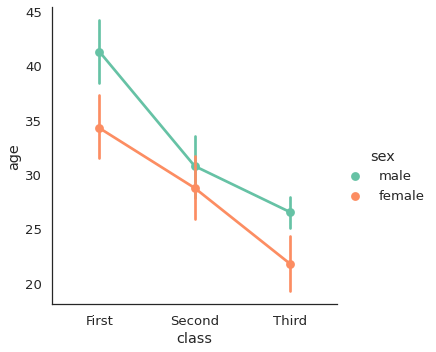

In [148]:
sns.catplot(data=df, x= 'class', y= 'age',  # 클래스별 연령대
            kind = 'point',   # 막대그래프
            hue = 'sex'   
            )
plt.show()


### (4) 범주별 분포 시각화


#### | Box plots


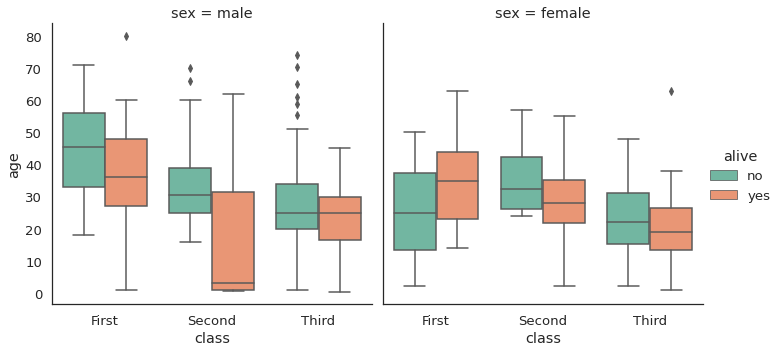

In [142]:
sns.catplot(data=df, x = 'class', y = 'age', kind = 'box',
            hue = 'alive', col = 'sex')

#### | Violin plots

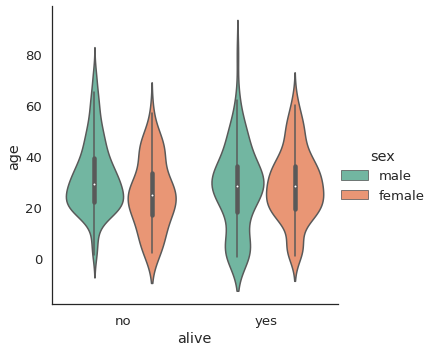

In [151]:
sns.catplot(data=df, x = 'alive', y = 'age', kind = 'violin',
            hue = 'sex')